In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
from sklearn.metrics import mean_squared_error,accuracy_score,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("D:\\Internship\\New folder\\DC_Properties_trimmed.csv")
df.head()

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALEDATE,PRICE,QUALIFIED,SALE_NUM,GBA,BLDG_NUM,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,SOURCE,FULLADDRESS,CITY,STATE,ZIPCODE,NATIONALGRID,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,4,0,Warm Cool,Y,2,8,4,1910,1988,1972,3.0,11/25/2003,1095000,Q,1,2522,1,3 Story,Row Inside,Very Good,Good,Common Brick,Metal- Sms,Hardwood,2,5,24,1680,7/22/2018,Residential,1748 SWANN STREET NW,WASHINGTON,DC,20009,18S UJ 23061 09289,38.914680,-77.040832,Old City 2,040 D Old City 2,4201,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,3,1,Hot Water Rad,Y,2,9,5,1910,2009,1984,3.0,6/21/2016,2100000,Q,3,2522,1,3 Story,Row Inside,Very Good,Very Good,Common Brick,Built Up,Hardwood,2,4,24,1680,7/22/2018,Residential,1744 SWANN STREET NW,WASHINGTON,DC,20009,18S UJ 23074 09289,38.914684,-77.040678,Old City 2,040 D Old City 2,4201,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,3,1,Hot Water Rad,Y,2,8,5,1900,2003,1984,3.0,7/12/2006,1602000,Q,1,2484,1,3 Story,Row Inside,Very Good,Good,Common Brick,Built Up,Hardwood,2,3,24,1680,7/22/2018,Residential,1742 SWANN STREET NW,WASHINGTON,DC,20009,18S UJ 23078 09288,38.914683,-77.040629,Old City 2,040 D Old City 2,4201,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,1,Hot Water Rad,Y,2,8,4,1906,2011,1972,3.0,9/29/2011,1050000,Q,1,2401,1,3 Story,Row Inside,Very Good,Average,Common Brick,Metal- Sms,Hardwood,2,1,24,1627,7/22/2018,Residential,1746 1/2 T STREET NW,WASHINGTON,DC,20009,18S UJ 23124 09368,38.915408,-77.040129,Old City 2,040 D Old City 2,4201,004201 2005,Ward 2,152,-77.040429,38.914881,NW
4,3,1,Warm Cool,Y,2,7,3,1908,2008,1967,2.0,5/3/2018,1430000,Q,4,1488,1,2 Story,Row Inside,Above Average,Very Good,Common Brick,Built Up,Hardwood,2,1,24,1424,7/22/2018,Residential,1727 SWANN STREET NW,WASHINGTON,DC,20009,18S UJ 23142 09324,38.915017,-77.039903,Old City 2,040 D Old City 2,4201,004201 2005,Ward 2,152,-77.040429,38.914881,NW


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28900 entries, 0 to 28899
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BATHRM              28900 non-null  int64  
 1   HF_BATHRM           28900 non-null  int64  
 2   HEAT                28900 non-null  object 
 3   AC                  28900 non-null  object 
 4   NUM_UNITS           28900 non-null  int64  
 5   ROOMS               28900 non-null  int64  
 6   BEDRM               28900 non-null  int64  
 7   AYB                 28900 non-null  int64  
 8   YR_RMDL             28900 non-null  int64  
 9   EYB                 28900 non-null  int64  
 10  STORIES             28900 non-null  float64
 11  SALEDATE            28900 non-null  object 
 12  PRICE               28900 non-null  int64  
 13  QUALIFIED           28900 non-null  object 
 14  SALE_NUM            28900 non-null  int64  
 15  GBA                 28900 non-null  int64  
 16  BLDG

In [4]:
df.describe()

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,PRICE,SALE_NUM,GBA,BLDG_NUM,KITCHENS,FIREPLACES,USECODE,LANDAREA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,SQUARE,X,Y
count,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,2.890000e+04,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000
mean,2.333806,0.662007,1.261246,7.502872,3.482318,1922.556574,2004.259273,1969.125433,2.165972,6.549323e+05,2.072664,1736.508685,1.000138,1.302491,0.715848,13.724637,2852.047197,20009.906851,38.913195,-77.010707,5509.161730,2663.814844,-77.010712,38.913201
std,1.038695,0.588201,0.635730,2.319767,1.160678,22.339850,17.183443,10.547762,5.563060,6.048247e+05,1.667003,807.095292,0.011764,0.697155,0.982890,4.704569,2865.397209,7.541925,0.030292,0.041245,3297.000377,1704.447584,0.041238,0.030293
min,0.000000,0.000000,0.000000,0.000000,0.000000,1754.000000,20.000000,1915.000000,0.000000,1.000000e+00,1.000000,407.000000,1.000000,0.000000,0.000000,11.000000,216.000000,20001.000000,38.819731,-77.113909,100.000000,65.000000,-77.113135,38.820576
25%,2.000000,0.000000,1.000000,6.000000,3.000000,1908.000000,2002.000000,1964.000000,2.000000,3.100000e+05,1.000000,1224.000000,1.000000,1.000000,0.000000,11.000000,1419.000000,20002.000000,38.892645,-77.033455,2301.000000,1052.000000,-77.033397,38.892800
50%,2.000000,1.000000,1.000000,7.000000,3.000000,1923.000000,2008.000000,1967.000000,2.000000,5.475000e+05,1.000000,1530.000000,1.000000,1.000000,0.000000,12.000000,1943.000000,20010.000000,38.911306,-77.005555,6700.000000,2621.000000,-77.005088,38.911421
75%,3.000000,1.000000,1.000000,8.000000,4.000000,1938.000000,2012.000000,1972.000000,2.000000,8.100000e+05,3.000000,2014.000000,1.000000,1.000000,1.000000,13.000000,3366.000000,20016.000000,38.933681,-76.985763,8301.000000,4011.000000,-76.986004,38.933636
max,11.000000,11.000000,6.000000,31.000000,20.000000,2015.000000,2018.000000,2017.000000,826.000000,2.396029e+07,15.000000,14966.000000,2.000000,44.000000,13.000000,39.000000,155905.000000,20036.000000,38.982532,-76.909758,11100.000000,6277.000000,-76.910511,38.982276


In [5]:
df.nunique()

BATHRM                   12
HF_BATHRM                 7
HEAT                     14
AC                        3
NUM_UNITS                 7
ROOMS                    27
BEDRM                    17
AYB                     193
YR_RMDL                 100
EYB                      80
STORIES                  26
SALEDATE               5678
PRICE                  4944
QUALIFIED                 2
SALE_NUM                 15
GBA                    3291
BLDG_NUM                  2
STYLE                    17
STRUCT                    8
GRADE                    12
CNDTN                     7
EXTWALL                  22
ROOF                     14
INTWALL                  12
KITCHENS                  8
FIREPLACES               14
USECODE                   8
LANDAREA               5884
GIS_LAST_MOD_DTTM         1
SOURCE                    1
FULLADDRESS           28897
CITY                      1
STATE                     1
ZIPCODE                  19
NATIONALGRID          28890
LATITUDE            

## Data Preprocessing

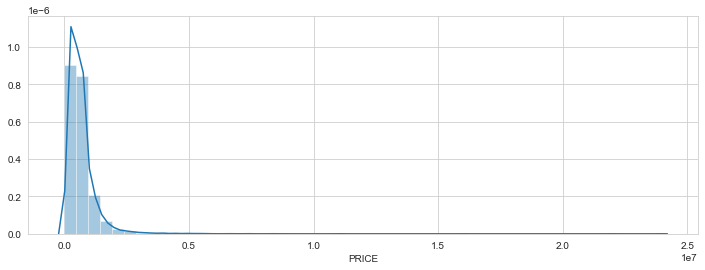

In [6]:
plt.figure(figsize=(12,4))
sns.distplot((df['PRICE']))

In [7]:
df['PRICE']=np.log(df['PRICE'])

In [8]:
df['SALEDATE']=pd.to_datetime(df['SALEDATE'])
df['SALEYEAR']=df['SALEDATE'].dt.year.astype('int64')
df.drop(['SALEDATE'],axis=1,inplace=True)

<Figure size 1008x360 with 0 Axes>

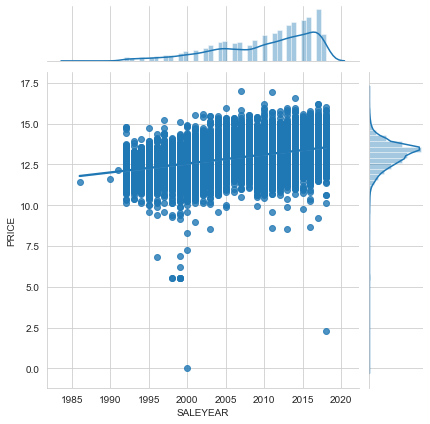

In [9]:
plt.figure(figsize=(14,5))
sns.jointplot(df['SALEYEAR'],df['PRICE'],kind="reg")

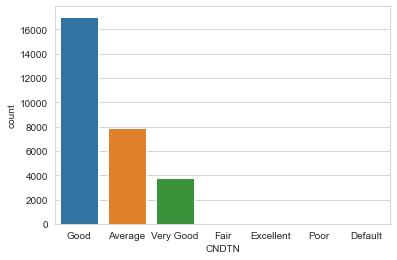

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(df['CNDTN'],order=df['CNDTN'].value_counts().index)
plt.show()

In [11]:
df['CNDTN']=df['CNDTN'].map({'Good':0,'Average':1,'Very Good':1,'Fair':1,'Excellent':1,'Poor':1,'Default':1})

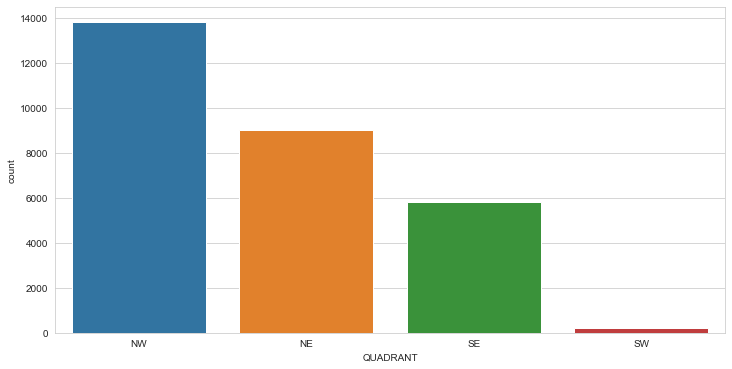

In [12]:
plt.figure(figsize=(12,6))
sns.countplot(df['QUADRANT'],order=df['QUADRANT'].value_counts().index)
plt.show()

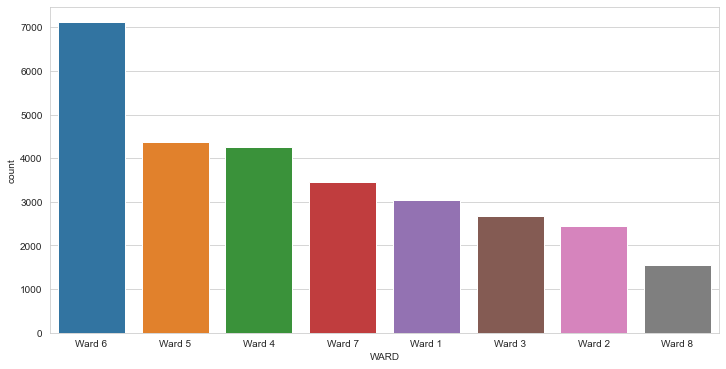

In [13]:
plt.figure(figsize=(12,6))
sns.countplot(df['WARD'],order=df['WARD'].value_counts().index)
plt.show()

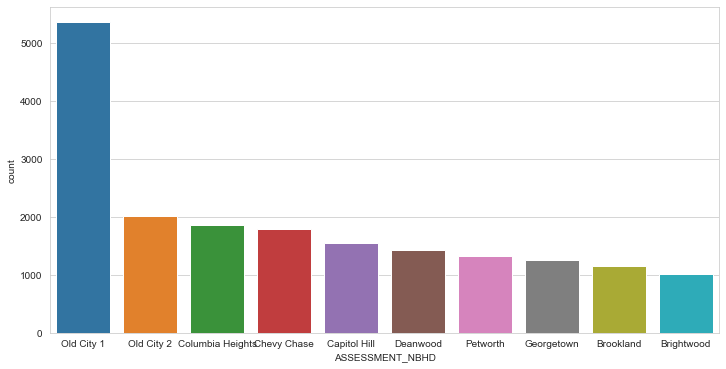

In [14]:
plt.figure(figsize=(12,6))
sns.countplot(df['ASSESSMENT_NBHD'],order=df['ASSESSMENT_NBHD'].value_counts().head(10).index)
plt.show()

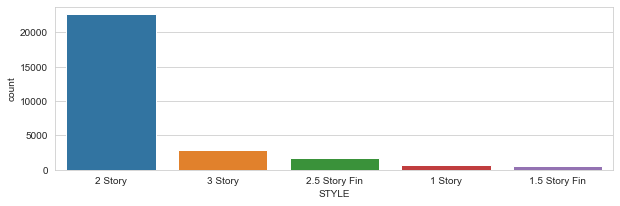

In [15]:
plt.figure(figsize=(10,3))
sns.countplot(df['STYLE'],order=df['STYLE'].value_counts().head(5).index)
plt.show()

In [16]:
top_ten_neigh = df.ASSESSMENT_NBHD.value_counts()[:10]
WARD = []
QUADRANT = []
for item in top_ten_neigh.index:
    ward = df[df.ASSESSMENT_NBHD ==item]['WARD'].values[0]
    quadrant = df[df.ASSESSMENT_NBHD ==item]['QUADRANT'].values[0]
    WARD.append(ward)
    QUADRANT.append(quadrant)
newdict={
    'Neighborhood': top_ten_neigh.index,
    'Ward': WARD,
    'Quadrant': QUADRANT
}

Top10Neigh = pd.DataFrame(newdict)
Top10Neigh

,Neighborhood,Ward,Quadrant
0,Old City 1,Ward 6,SW
1,Old City 2,Ward 2,NW
2,Columbia Heights,Ward 1,NW
3,Chevy Chase,Ward 3,NW
4,Capitol Hill,Ward 6,NE
5,Deanwood,Ward 7,NE
6,Petworth,Ward 4,NW
7,Georgetown,Ward 2,NW
8,Brookland,Ward 5,NE
9,Brightwood,Ward 4,NW


In [17]:
df.isnull().sum()

BATHRM                0
HF_BATHRM             0
HEAT                  0
AC                    0
NUM_UNITS             0
ROOMS                 0
BEDRM                 0
AYB                   0
YR_RMDL               0
EYB                   0
STORIES               0
PRICE                 0
QUALIFIED             0
SALE_NUM              0
GBA                   0
BLDG_NUM              0
STYLE                 0
STRUCT                0
GRADE                 0
CNDTN                 0
EXTWALL               0
ROOF                  0
INTWALL               0
KITCHENS              0
FIREPLACES            0
USECODE               0
LANDAREA              0
GIS_LAST_MOD_DTTM     0
SOURCE                0
FULLADDRESS           0
CITY                  0
STATE                 0
ZIPCODE               0
NATIONALGRID          0
LATITUDE              0
LONGITUDE             0
ASSESSMENT_NBHD       0
ASSESSMENT_SUBNBHD    0
CENSUS_TRACT          0
CENSUS_BLOCK          0
WARD                  0
SQUARE          

In [18]:
df_clean=df.drop(['GIS_LAST_MOD_DTTM','FULLADDRESS','CITY','STATE','LATITUDE','LONGITUDE','X','Y','USECODE','SALE_NUM',
                  'LANDAREA','NATIONALGRID','SOURCE','ZIPCODE','BLDG_NUM','CENSUS_TRACT','SQUARE','CENSUS_BLOCK','STORIES',
                  'ASSESSMENT_SUBNBHD'],axis=1)

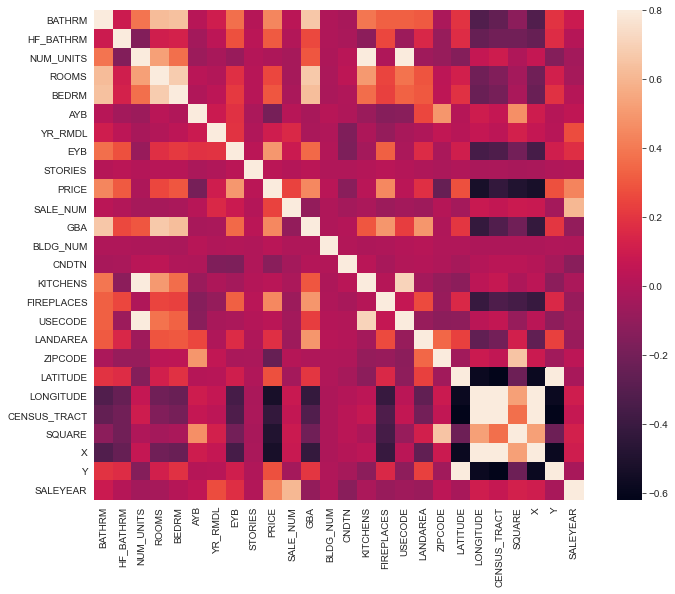

In [19]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [20]:
from sklearn.preprocessing import LabelEncoder
df_clean['HEAT']=LabelEncoder().fit_transform(df_clean['HEAT']).astype("int64")
df_clean['AC']=LabelEncoder().fit_transform(df_clean['AC']).astype("int64")
df_clean['QUALIFIED']=LabelEncoder().fit_transform(df_clean['QUALIFIED']).astype("int64")
df_clean['STYLE']=LabelEncoder().fit_transform(df_clean['STYLE']).astype("int64")
df_clean['STRUCT']=LabelEncoder().fit_transform(df_clean['STRUCT']).astype("int64")
df_clean['GRADE']=LabelEncoder().fit_transform(df_clean['GRADE']).astype("int64")
df_clean['EXTWALL']=LabelEncoder().fit_transform(df_clean['EXTWALL']).astype("int64")
df_clean['ROOF']=LabelEncoder().fit_transform(df_clean['ROOF']).astype("int64")
df_clean['INTWALL']=LabelEncoder().fit_transform(df_clean['INTWALL']).astype("int64")
df_clean['ASSESSMENT_NBHD']=LabelEncoder().fit_transform(df_clean['ASSESSMENT_NBHD']).astype("int64")
df_clean['WARD']=LabelEncoder().fit_transform(df_clean['WARD']).astype("int64")
df_clean['QUADRANT']=LabelEncoder().fit_transform(df_clean['QUADRANT']).astype("int64")

In [21]:
df_clean.head()

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,PRICE,QUALIFIED,GBA,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,ASSESSMENT_NBHD,WARD,QUADRANT,SALEYEAR
0,4,0,12,2,2,8,4,1910,1988,1972,13.906265,0,2522,6,3,11,0,5,6,3,2,5,25,1,1,2003
1,3,1,7,2,2,9,5,1910,2009,1984,14.557448,0,2522,6,3,11,1,5,0,3,2,4,25,1,1,2016
2,3,1,7,2,2,8,5,1900,2003,1984,14.286763,0,2484,6,3,11,0,5,0,3,2,3,25,1,1,2006
3,3,1,7,2,2,8,4,1906,2011,1972,13.864301,0,2401,6,3,11,1,5,6,3,2,1,25,1,1,2011
4,3,1,12,2,2,7,3,1908,2008,1967,14.173185,0,1488,3,3,0,1,5,0,3,2,1,25,1,1,2018


In [22]:
df_clean.describe()

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,PRICE,QUALIFIED,GBA,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,ASSESSMENT_NBHD,WARD,QUADRANT,SALEYEAR
count,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000
mean,2.333806,0.662007,7.241626,1.834014,1.261246,7.502872,3.482318,1922.556574,2004.259273,1969.125433,13.110861,0.166851,1736.508685,3.345294,3.387820,3.302422,0.410138,6.727059,3.517647,3.732630,1.302491,0.715848,16.803702,3.637820,0.903806,2010.098824
std,1.038695,0.588201,2.722069,0.372818,0.635730,2.319767,1.160678,22.339850,17.183443,10.547762,0.787342,0.372849,807.095292,1.340236,1.114897,3.972233,0.491867,4.996947,3.258264,2.275492,0.697155,0.982890,8.800639,2.008977,0.730860,6.313575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1754.000000,20.000000,1915.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1986.000000
25%,2.000000,0.000000,5.000000,2.000000,1.000000,6.000000,3.000000,1908.000000,2002.000000,1964.000000,12.644328,0.000000,1224.000000,3.000000,3.000000,0.000000,0.000000,5.000000,0.000000,3.000000,1.000000,0.000000,9.000000,2.000000,0.000000,2006.000000
50%,2.000000,1.000000,7.000000,2.000000,1.000000,7.000000,3.000000,1923.000000,2008.000000,1967.000000,13.213118,0.000000,1530.000000,3.000000,3.000000,1.000000,0.000000,5.000000,2.000000,3.000000,1.000000,0.000000,16.000000,4.000000,1.000000,2012.000000
75%,3.000000,1.000000,7.000000,2.000000,1.000000,8.000000,4.000000,1938.000000,2012.000000,1972.000000,13.604790,0.000000,2014.000000,3.000000,4.000000,8.000000,1.000000,5.000000,6.000000,3.000000,1.000000,1.000000,24.000000,5.000000,1.000000,2015.000000
max,11.000000,11.000000,13.000000,2.000000,6.000000,31.000000,20.000000,2015.000000,2018.000000,2017.000000,16.991908,1.000000,14966.000000,16.000000,7.000000,11.000000,1.000000,21.000000,13.000000,11.000000,44.000000,13.000000,32.000000,7.000000,3.000000,2018.000000


In [23]:
response= df_clean['PRICE']
features= df_clean.drop(['PRICE'],axis=1)

In [24]:
from sklearn.preprocessing import MinMaxScaler #To handle outliers efficently
scaler = MinMaxScaler().fit_transform(features)
features = pd.DataFrame(scaler,columns=features.columns.to_list())

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
features_train,features_test,response_train,response_test =train_test_split(features,response,test_size = 0.2,
                                                                            shuffle = True,random_state = 42)

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import neighbors

In [27]:
models_list = [RandomForestRegressor(random_state=42,n_jobs=-1),LinearRegression(),neighbors.KNeighborsRegressor(5)]
models_name = ['Random Forest','Linear Regression','Weighted KNN']
Error_list =[]
Error_list_1=[]
results_dict = {}
for model in range(len(models_list)):
    classifier= models_list[model]
    classifier.fit(features_train,response_train.values.ravel())
    response_predict=classifier.predict(features_test)
    Error_list.append(np.sqrt(mean_squared_error(response_test,response_predict)))
    Error_list_1.append(mean_absolute_error(response_test,response_predict)) 
results_dict={"Models Name":models_name,'MAE':Error_list_1,'RMSE':Error_list}
results_df=pd.DataFrame(results_dict).sort_values(by='RMSE')
results_df

,Models Name,MAE,RMSE
0,Random Forest,0.185557,0.321985
2,Weighted KNN,0.267752,0.413486
1,Linear Regression,0.292978,0.416640


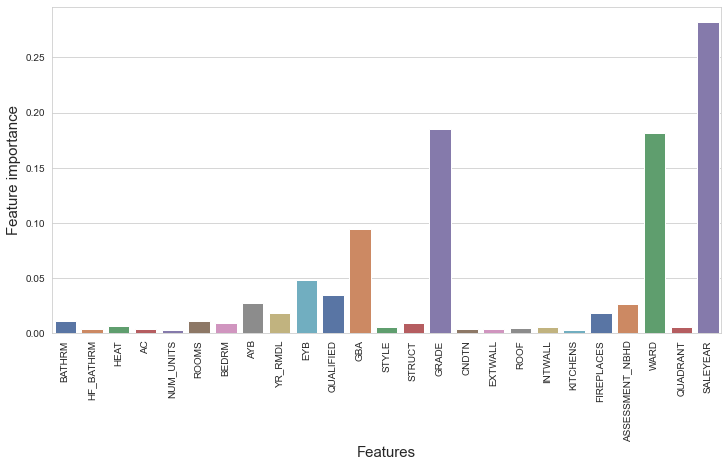

In [28]:
classifier = RandomForestRegressor(random_state=42,n_jobs=-1)
classifier.fit(features_train,response_train.values.ravel())
importance=classifier.feature_importances_
feature_names = features.columns.to_list()
importanc_df =pd.DataFrame(feature_names,columns=['feature_names'])
importanc_df['importance']=importance
f, ax = plt.subplots(figsize=(12,6))
plt.xticks(rotation='90')
sns.barplot(x=importanc_df.feature_names, y=importanc_df.importance,palette="deep")
plt.xlabel('Features', fontsize=15)
plt.ylabel('Feature importance', fontsize=15)
plt.show()

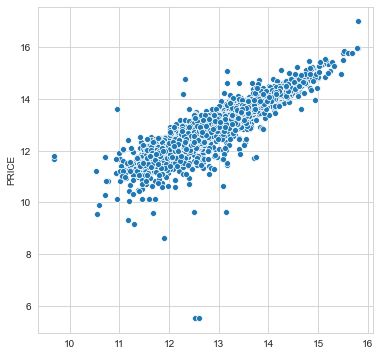

In [29]:
classifier=RandomForestRegressor(random_state=42,n_jobs=-1)
classifier.fit(features_train,response_train.values.ravel())
response_predict=classifier.predict(features_test)
plt.figure(figsize=(6,6))
sns.scatterplot(response_predict,response_test)
plt.show()

In [30]:
response= df_clean['CNDTN']
features= df_clean.drop(['CNDTN'],axis=1)

In [31]:
features_train,features_test,response_train,response_test =train_test_split(features,response,test_size = 0.2,
                                                                            shuffle = True,random_state = 42)

In [32]:
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [33]:
models_list = [CatBoostClassifier(iterations=100,random_seed=42,learning_rate=0.1,silent=True),LGBMClassifier(objective='binary'),
               XGBClassifier(objective='binary:logistic',random_state=42),
               RandomForestClassifier(random_state=42,n_jobs=-1),
               GaussianNB(),KNeighborsClassifier(n_jobs=-1)]
models_name = ['Categorical Gradient Boosting','Light Gradient Boosting','Extreme Gradient Boosting',
               'Random Forest Classifier','Gaussian Naïve Bayes','K-Nearest Neighbor']
accuracy_list =[]
results_dict = {}
for model in range(len(models_list)):
    classifier= models_list[model]
    classifier.fit(features_train,response_train.values.ravel())
    response_predict=classifier.predict(features_test)
    accuracy_list.append(accuracy_score(response_test,response_predict))    
results_dict={"Models Name":models_name,'Accuracy Score':accuracy_list}
results_df=pd.DataFrame(results_dict).sort_values(by='Accuracy Score',ascending=False)
results_df

,Models Name,Accuracy Score
1,Light Gradient Boosting,0.739273
3,Random Forest Classifier,0.738927
2,Extreme Gradient Boosting,0.733045
0,Categorical Gradient Boosting,0.730623
5,K-Nearest Neighbor,0.654325
4,Gaussian Naïve Bayes,0.635986


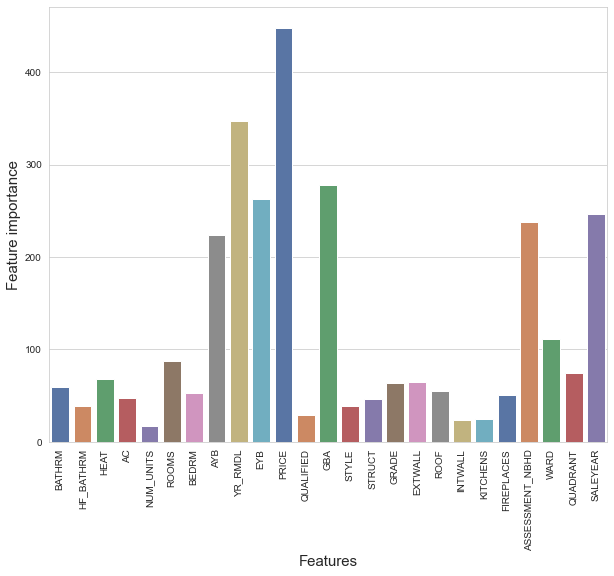

In [34]:
classifier = LGBMClassifier(objective='binary')
classifier.fit(features_train,response_train.values.ravel())
importance=classifier.feature_importances_
feature_names = features.columns.to_list()
importanc_df =pd.DataFrame(feature_names,columns=['feature_names'])
importanc_df['importance']=importance
f, ax = plt.subplots(figsize=(10, 8))
plt.xticks(rotation='90')
sns.barplot(x=importanc_df.feature_names, y=importanc_df.importance,palette="deep")
plt.xlabel('Features', fontsize=15)
plt.ylabel('Feature importance', fontsize=15)
plt.show()